# Conversion Report

step through each example

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os
import sys

try:
    import jose
except ModuleNotFoundError:
    print('jose not in PYTHONPATH, needs to be added')
    print('Attempting to add temporarily to demonstrate example functionality')
    sys.path.insert(1, os.path.join(os.getcwd(), 'PyJose'))
    import jose
    
from astropy.io import fits as pyfits

imageDir = os.path.join(os.getcwd(), 'PyJose', 'images')
dataDir = os.path.join(os.getcwd(), 'PyJose', 'data')
testDir = os.path.join(os.getcwd(), 'PyJose', 'jose', 'test', 'testData')
example1Dir = os.path.join(dataDir, 'example1')

jose not in PYTHONPATH, needs to be added
Attempting to add temporarily to demonstrate example functionality


In [2]:
# set up example 1
frame1 = pyfits.open(os.path.join(imageDir, 'ex1.fits'))[0]
Q = frame1.header.get('EPADU')
rn = frame1.header.get('RDNOISE') / Q
leftBound = 240
rightBound = 270
variance_image = np.abs(frame1.data) / Q + rn**2

### Polynomial Fitting

In [3]:
loadData = lambda filename: np.loadtxt('PyJose/data/procvect/' + filename + '.csv', delimiter=',')
idl_fittedData = loadData('bgRow')
data = loadData('datav')

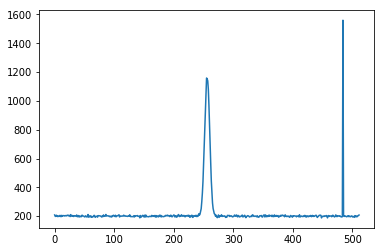

In [4]:
plt.plot(data)

### Background Fitting Comparison

In [5]:
background = jose.fit_background(frame1.data, (leftBound, rightBound), variance_image)

In [6]:
idl_background = np.loadtxt(os.path.join('PyJose/data/example1', 'bgim.csv'), delimiter=',')
difference_background = background - idl_background

Text(0.5,1,'Differences')

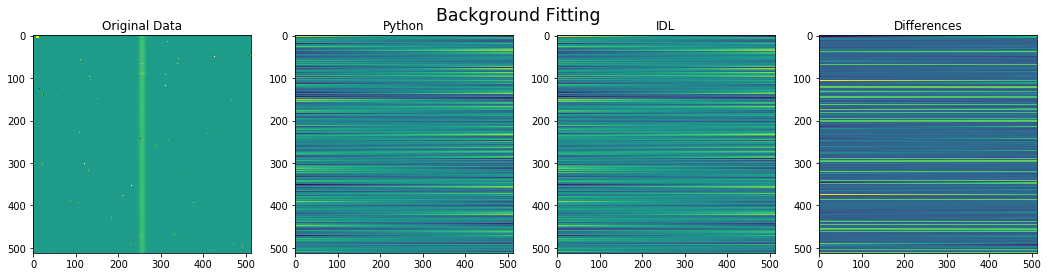

In [7]:
f, ax = plt.subplots(1,4, figsize=(18,4))

f.suptitle("Background Fitting", size='xx-large')

ax[0].imshow(frame1.data, norm=LogNorm())
ax[0].set_title('Original Data')
ax[1].imshow(background)
ax[1].set_title('Python')
ax[2].imshow(idl_background)
ax[2].set_title('IDL')
ax[3].imshow(difference_background)
ax[3].set_title('Differences')

### Profile Fitting

In [8]:
profileDir = os.path.join(testDir, 'fitprofData', 'test_00')

sky_background = np.loadtxt(os.path.join(profileDir, 'bgim.csv'), delimiter=',')
data = np.loadtxt(os.path.join(profileDir, 'dataim.csv'), delimiter=',')
variance = np.loadtxt(os.path.join(profileDir, 'varim.csv'), delimiter=',')

profile = jose.create_profile(data, sky_background, variance)

Mean Difference: 3.60455095807e-05
Max Difference: 0.00238269017944


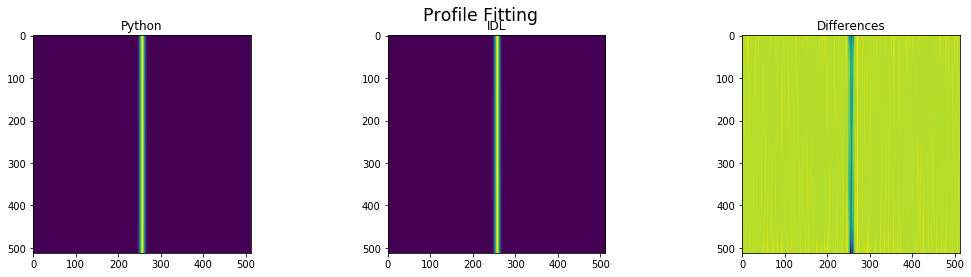

In [9]:
idl_profile = np.loadtxt(os.path.join(profileDir, 'profim.csv'), delimiter=',')

f, ax = plt.subplots(1,3, figsize=(18,4))
f.suptitle("Profile Fitting", size='xx-large')
ax[0].imshow(profile)
ax[0].set_title('Python')
ax[1].imshow(idl_profile)
ax[1].set_title('IDL')
diff = profile-idl_profile
ax[2].imshow(diff)
ax[2].set_title('Differences')
print('Mean Difference: ' + str(np.mean(np.abs(diff))))
print('Max Difference: ' + str(np.max(np.abs(diff))))

### Spectral Extraction

In [49]:
specDir = os.path.join(testDir, 'extrspecData', 'test_00')

sky = np.loadtxt(os.path.join(specDir, 'bgim.csv'), delimiter=',')
data = np.loadtxt(os.path.join(specDir, 'dataim.csv'), delimiter=',')
variance = np.loadtxt(os.path.join(specDir, 'varim.csv'), delimiter=',')
profile = np.loadtxt(os.path.join(specDir, 'profim.csv'), delimiter=',')
idl_spectrum = np.loadtxt(os.path.join(specDir, 'optspec.csv'), delimiter=',')

spectrum = jose.extract(data-sky, variance, profile)

Maximum Discrepancy: 8905.5677245
Average Discrepancy: 3649.71793646


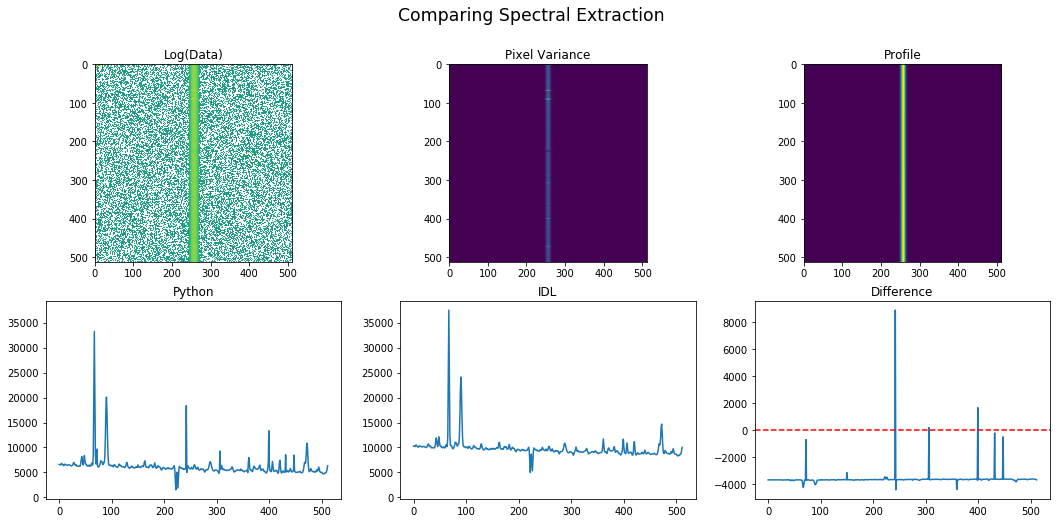

In [50]:
figCols = 3
figRows = 2
ax = np.full((figRows, figCols), None)

f = plt.figure(figsize=(18,8))
f.suptitle('Comparing Spectral Extraction', size='xx-large')
ax[0,0] = f.add_subplot(2,3,1)
ax[0,0].imshow(data, norm=LogNorm())
ax[0,0].set_title('Log(Data)')
ax[0,1] = f.add_subplot(2,3,2)
ax[0,1].imshow(variance)
ax[0,1].set_title('Pixel Variance')
ax[0,2] = f.add_subplot(2,3,3)
ax[0,2].imshow(profile)
ax[0,2].set_title('Profile')
ax[1,0] = f.add_subplot(2,3,4)
ax[1,0].plot(spectrum)
ax[1,0].set_title('Python')
ax[1,1] = f.add_subplot(2,3,5, sharey=ax[1,0])
ax[1,1].plot(idl_spectrum)
ax[1,1].set_title('IDL')
ax[1,2] = f.add_subplot(2,3,6)
ax[1,2].plot(spectrum - idl_spectrum)
ax[1,2].axhline(color='r', linestyle='--')
ax[1,2].set_title('Difference')

absolute_difference = np.abs(spectrum - idl_spectrum)
print('Maximum Discrepancy: ' + str(np.max(absolute_difference)))
print('Average Discrepancy: ' + str(np.mean(absolute_difference)))

### Example 1

In [26]:
np.mean(idl_spectrum)

9788.6067447989244

In [12]:
frame1 = pyfits.open(os.path.join(imageDir, 'ex1.fits'))[0]
Q = frame1.header.get('EPADU')
rn = frame1.header.get('RDNOISE') / Q
leftBound = 240
rightBound = 270
varim = np.abs(frame1.data) / Q + rn**2
optimal_spectrum = jose.optimal_extraction(frame1.data, varim, rn, Q, (leftBound, rightBound))

Text(0.5,1,'Differences')

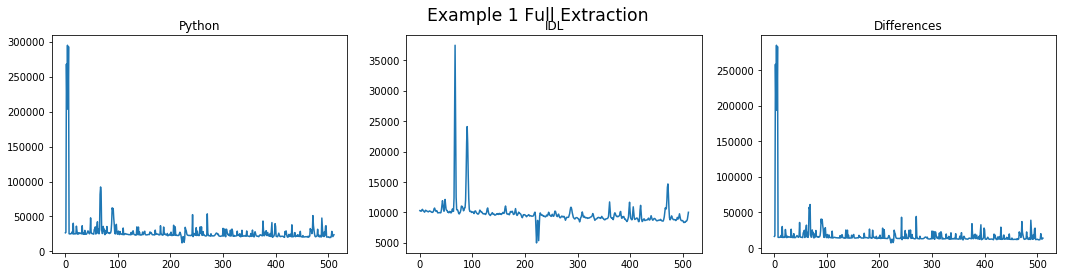

In [13]:
idl_spectrum = np.loadtxt('PyJose/data/example1/opspec1.csv')

f, ax = plt.subplots(1,3, figsize=(18,4))
f.suptitle("Example 1 Full Extraction", size='xx-large')
ax[0].plot(optimal_spectrum)
ax[0].set_title('Python')
ax[1].plot(idl_spectrum)
ax[1].set_title('IDL')
ax[2].plot(optimal_spectrum - idl_spectrum)
ax[2].set_title('Differences')